# Classification for beginners
## Adult Income

We are going to implement classification algorithms in order to predict the income category for USA habitants based on *adult* dataset.

### 1 Introduction
 * Abstract
 * Dataset description
 * Fetching the data
 
### 2 Data Understanding
 * Check for NAs
 * Correlations and descriptions
 * Heatmaps

### 3 Data Preparation
 * Fill NAs
 * Data division
 * Categorical convertion to numerical
 * Scale
  

### 4 Modeling


### 5 Evaluation

## Abstract
For the population of USA, predict whether the income exceeds 50K $ a year or not.
Also known as *adult* dataset.



In [1]:
import sys
import numpy as np
import matplotlib

In [2]:
print("Python:", sys.version)
print("Numpy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.19.2
Matplotlib: 3.3.2


In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Neural networks can be used for classification, regression and clustering. 
In sklearn we select for for both **classication** and **regression**:

*from sklearn.neural_network import MLPClassifier*   
*from sklearn.neural_network import MLPregressor*


For regularization (clustering) both MLPClassifier and MLPRegressor use parameter alpha for regularization. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neural_network import MLPClassifier

In [3]:
url = "C:\\Datasets\\UCI\\Adult\\adult.data"
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income']

dataset = pd.read_csv(url, names=names)
                    

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Columns to remove

It looks like column *final_weight* (a.k.a *fnlwgt*) tells the proportion of the population that has the same set of features. Basically, every row in the original table was de-duplicated and final weight stores number of rows that had excatly the same value. We definitely don't need to use this column during the model training.


In [5]:
dataset = dataset.drop('fnlwgt', axis=1)

In [6]:
dataset.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Check for NAs

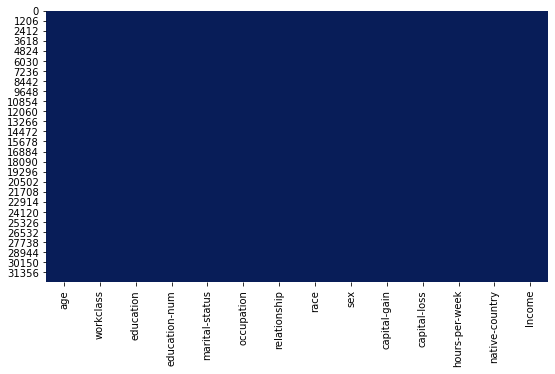

In [8]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.heatmap(dataset.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

## Seaborn heatmaps

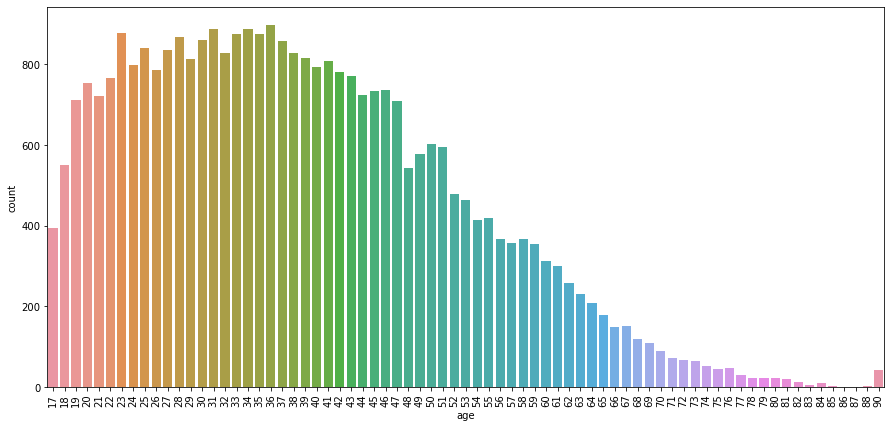

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(data=dataset, x='age')
ax.tick_params(axis='x', rotation=90)


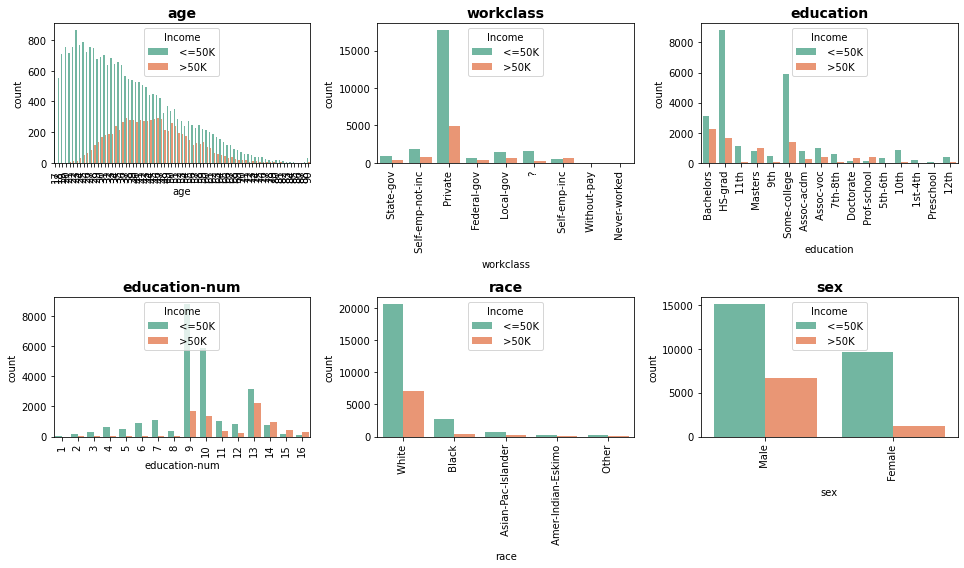

In [10]:
cols = ['age', 'workclass', 'education', 'education-num', 'race', 'sex']

#'marital-status', 'occupation', 'relationship', , 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'

nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*4))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(dataset[cols[i]], hue=dataset["Income"], ax=ax, palette="Set2")
        ax.set_title(cols[i], fontsize=14, fontweight='bold')
        ax.legend(title="Income", loc='upper center') 
        ax.tick_params(axis='x', rotation=90)
        
plt.tight_layout()  

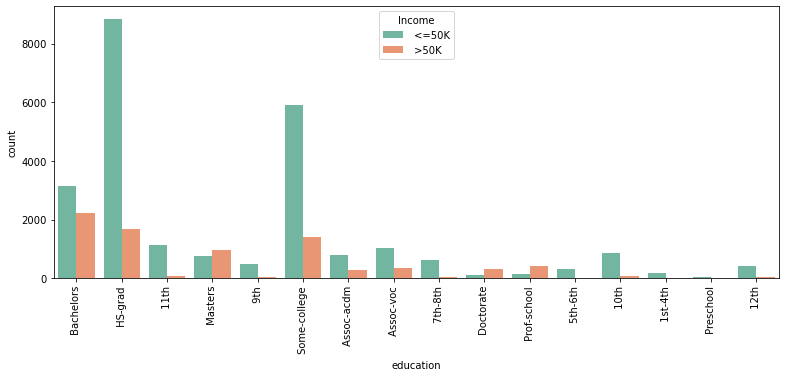

In [11]:
fig, ax = plt.subplots(figsize=(13,5))
sns.countplot(x="education", hue="Income", data=dataset, palette="Set2")
ax.tick_params(axis='x', rotation=90)

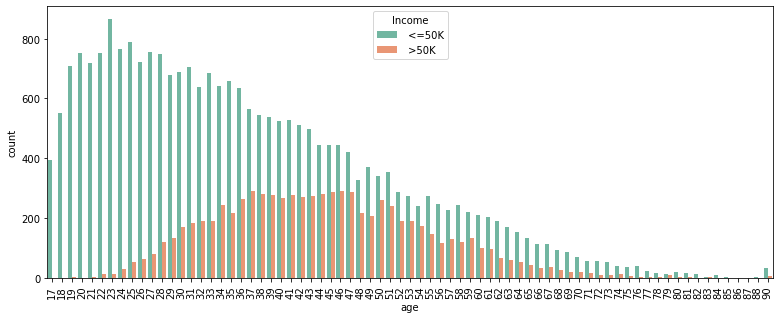

In [12]:
fig, ax = plt.subplots(figsize=(13,5))
sns.countplot(x="age", hue="Income", data=dataset, palette="Set2")
ax.tick_params(axis='x', rotation=90)

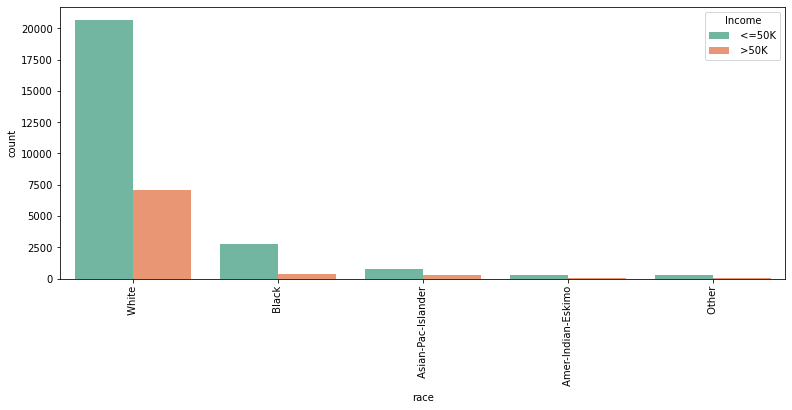

In [13]:
fig, ax = plt.subplots(figsize=(13,5))
sns.countplot(x="race", hue="Income", data=dataset, palette="Set2")
ax.tick_params(axis='x', rotation=90)

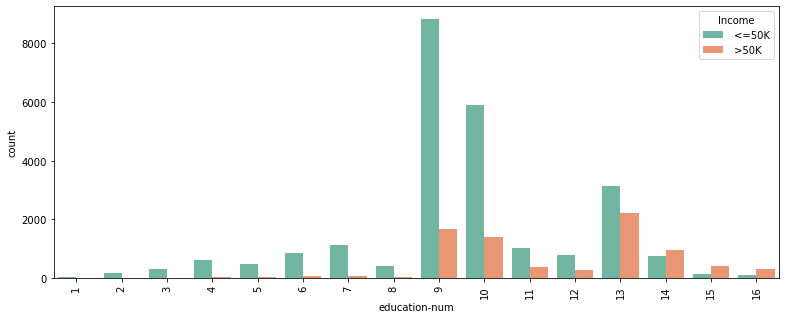

In [14]:
fig, ax = plt.subplots(figsize=(13,5))
sns.countplot(x="education-num", hue="Income", data=dataset, palette="Set2")
ax.tick_params(axis='x', rotation=90)

## Data Preparation

In [15]:
dataset = dataset[['sex', 'age', 'education-num', 'race', 'workclass', 'occupation', 'relationship', 'Income']]
X = dataset.iloc[:, 0:13]
y = dataset.iloc[:, -1]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


,sex,age,education-num,race,workclass,occupation,relationship,Income
26816,Male,54,10,White,Private,Sales,Husband,>50K
8257,Female,19,10,White,Private,Adm-clerical,Own-child,<=50K
4900,Male,33,9,White,Private,Craft-repair,Husband,>50K
25359,Female,38,13,Other,?,?,Wife,>50K
21092,Female,39,12,White,Private,Other-service,Own-child,<=50K
...,...,...,...,...,...,...,...,...
3835,Female,40,9,White,Private,Other-service,Not-in-family,<=50K
19353,Male,67,14,White,Self-emp-not-inc,Prof-specialty,Not-in-family,>50K
24124,Female,41,10,Black,Private,Adm-clerical,Not-in-family,<=50K
21029,Male,45,13,White,Private,Exec-managerial,Husband,>50K


### Feature selection (with categorical data)

Feature selection is often straightforward when working with real-valued data, such as using the Pearson’s correlation coefficient, but can be challenging when working with categorical data.

The two most commonly used feature selection methods for categorical input data when the target variable is also categorical (e.g. classification predictive modeling) are the chi-squared statistic and the mutual information statistic.

**Ordinal Encode Categorical Data** or convert cateogrical to numerical

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [22]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

ValueError: Found unknown categories [86] in column 1 during transform

## Modeling

In [ ]:
from sklearn import svm

In [ ]:
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))